In [1]:
import pickle
import math
import sys
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset
from skimage import draw
from skimage import io
from skimage import transform
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import warnings
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
plt.rcParams["figure.figsize"] = (10,10)
import pickle
warnings.filterwarnings("ignore")

def confidence_interval(data, size=10000, func=np.mean):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    np.random.seed(42)
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return np.percentile(bs_replicates, [2.5, 97.5])

/home/kti01/miniconda3/envs/artifact_detection/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


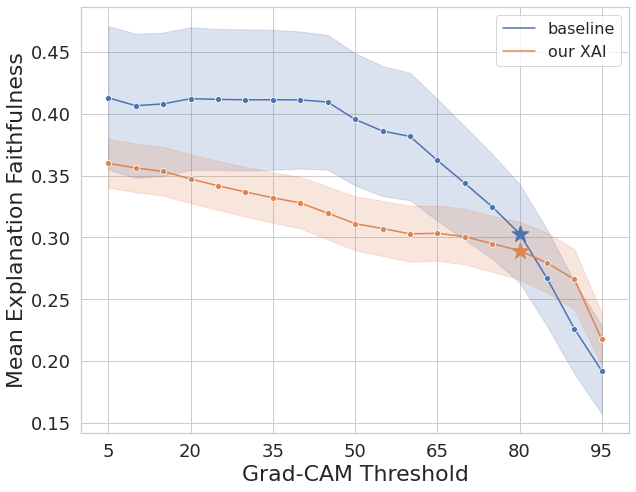

In [6]:
exp = pd.read_csv('../data/classifier/fidelity.csv')
exp['Classifier'] = 'our XAI'
bas = pd.read_csv('../data/baseline/fidelity.csv')
bas['Classifier'] = 'baseline'
df = pd.concat([bas, exp]).reset_index()


fig = plt.figure(figsize=(9,7))
ax = sns.lineplot(data=df, x='Threshold', y='Fidelity', hue='Classifier', seed=42, ci=95, n_boot=10000, marker='o')

palette = sns.color_palette(['grey'], len(df))
plt.yticks(size=18)
plt.xticks(size=18)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[0]), (handles[1], handles[1])],
          labels=['baseline', 'our XAI'],handlelength=2)
ax.legend(fontsize=16)
plt.xlabel('Grad-CAM Threshold', size=22)
plt.ylabel('Mean Explanation Faithfulness', size=22)
plt.xlim(0, 100)
plt.xticks(range(5, 100, 15))
plt.scatter(x=80, y=exp[exp['Threshold'] == 80].Fidelity.mean(), s=300, c='#dd8452', marker='*', zorder=2)
plt.scatter(x=80, y=bas[bas['Threshold'] == 80].Fidelity.mean(), s=300, c='#4c72b0', marker='*', zorder=2)
plt.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/fidelity/fidelity.pdf", dpi=500, bbox_inches='tight')

In [5]:
#df.drop('index', axis=1).to_excel("../Source Data/Extended_Data_Fig2.xlsx", index=False)

In [110]:
print(exp[exp['Threshold'] == 80]['Fidelity'].mean())
print(confidence_interval(exp[exp['Threshold'] == 80]['Fidelity']))

0.2893376892725
[0.26665386 0.31238043]


In [111]:
print(bas[bas['Threshold'] == 80]['Fidelity'].mean())
print(confidence_interval(bas[bas['Threshold'] == 80]['Fidelity']))

0.3029961027118906
[0.26323935 0.34360341]


<AxesSubplot:ylabel='Fidelity'>

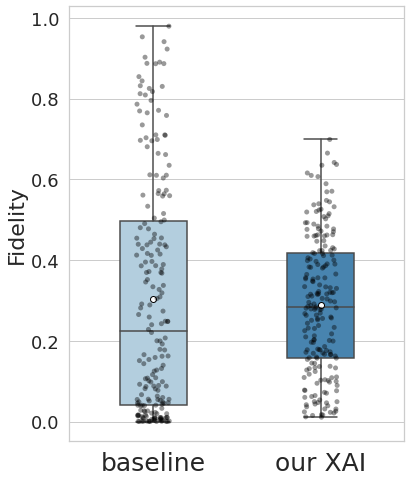

In [145]:
a = bas[bas['Threshold'] == 80].rename({'Fidelity': 'baseline'}, axis=1)
b = exp[exp['Threshold'] == 80].rename({'Fidelity': 'our XAI'}, axis=1)
df = pd.concat([a, b], axis=1)
plt.figure(figsize=(6,8))
palette = sns.color_palette(['grey'], len(df))
sns.boxplot(data=df[['baseline', 'our XAI']], width=0.4, palette='Blues', showfliers=False, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
plt.yticks(size=18)
plt.xticks(size=25)
plt.xlabel('', size=22)
plt.ylabel('Fidelity', size=22)
sns.stripplot(data=df[['baseline', 'our XAI']], color='black', alpha=0.4)